## Tips and Tricks

#### Pandas tem diversas outras funcionalidades, e ainda podemos combinar mais de uma delas juntas pra obter diferentes resultados.,,

Nessa parte, vamos passar por algumas que se mostram bem úteis ao longo dos trabalhos de análise e processamento de dados...



In [1]:
#Primeiro, carregamos as bibliotecas:
import numpy as np
import pandas as pd

In [2]:
#Vamos aproveitar o mesmo dataset que utilizamos antes, o famoso IRIS_DATA
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])

df.tail(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [3]:
#Usualmente, nas primeiras etapas, queremos conhecer nossos dados, então é muito comum rodas as sequintes funções:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [10]:
#Sumário estatístico de cada coluna
df[['petal width (cm)','target']].describe()

,petal width (cm),target
count,150.000000,150.000000
mean,1.199333,1.000000
std,0.762238,0.819232
min,0.100000,0.000000
25%,0.300000,0.000000
50%,1.300000,1.000000
75%,1.800000,2.000000
max,2.500000,2.000000


In [5]:
#Um jeito rápido de obter a dimensão é usar 'shape'
df.shape

(150, 5)

In [7]:
#Valores únicos existentes em cada coluna
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [6]:
#Valores únicos de uma coluna:
df['target'].nunique()

3

In [12]:
#E, obviamente, queremos saber quais são esses valores únicos
df['target'].unique()

array([0., 1., 2.])

In [4]:
df['petal width (cm)'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [7]:
#Depois de saber quantos únicos temos e quais eles são, o passo natural é saber como estão distribuidos:
df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [5]:
df['petal width (cm)'].value_counts()

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
2.0     6
2.1     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width (cm), dtype: int64

In [16]:
#Essa aqui é minha favorita: Correlação de todos os valores por todos:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [6]:
#Outra tarefa comum é querer aplicar alguma transformação em alguma coluna...
#Podemos fazer isso definindo uma função qualquer:

def to_category(x):
    if x == 0:
        return 'Setosa'
    elif x == 1:
        return 'Virginica'
    else:
        return 'Versicolor'


In [7]:
#E após isso, usamos apply para a coluna que desejamos
df['target2'] = df['target'].apply(to_category)
print(df['target2'].value_counts())
df.head()

Versicolor    50
Setosa        50
Virginica     50
Name: target2, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
0,5.1,3.5,1.4,0.2,0.0,Setosa
1,4.9,3.0,1.4,0.2,0.0,Setosa
2,4.7,3.2,1.3,0.2,0.0,Setosa
3,4.6,3.1,1.5,0.2,0.0,Setosa
4,5.0,3.6,1.4,0.2,0.0,Setosa


In [14]:
#As vezes, queremos armazenar o nome das colunas em uma lista:
lista = df.columns
print(lista)

print('')

for i in lista:
    print('coluna =',i)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target2'],
      dtype='object')

coluna = sepal length (cm)
coluna = sepal width (cm)
coluna = petal length (cm)
coluna = petal width (cm)
coluna = target
coluna = target2


In [23]:
#E também os index
df.index

RangeIndex(start=0, stop=150, step=1)

In [15]:
for i in df.index:
    print('index =',i)

index = 0
index = 1
index = 2
index = 3
index = 4
index = 5
index = 6
index = 7
index = 8
index = 9
index = 10
index = 11
index = 12
index = 13
index = 14
index = 15
index = 16
index = 17
index = 18
index = 19
index = 20
index = 21
index = 22
index = 23
index = 24
index = 25
index = 26
index = 27
index = 28
index = 29
index = 30
index = 31
index = 32
index = 33
index = 34
index = 35
index = 36
index = 37
index = 38
index = 39
index = 40
index = 41
index = 42
index = 43
index = 44
index = 45
index = 46
index = 47
index = 48
index = 49
index = 50
index = 51
index = 52
index = 53
index = 54
index = 55
index = 56
index = 57
index = 58
index = 59
index = 60
index = 61
index = 62
index = 63
index = 64
index = 65
index = 66
index = 67
index = 68
index = 69
index = 70
index = 71
index = 72
index = 73
index = 74
index = 75
index = 76
index = 77
index = 78
index = 79
index = 80
index = 81
index = 82
index = 83
index = 84
index = 85
index = 86
index = 87
index = 88
index = 89
index = 90
index = 9

In [24]:
#Podemos ordenar por alguma coluna
df.sort_values(by='sepal width (cm)', inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2,target3
60,5.0,2.0,3.5,1.0,1.0,Virginica,espécie2
62,6.0,2.2,4.0,1.0,1.0,Virginica,espécie2
119,6.0,2.2,5.0,1.5,2.0,Versicolor,espécie3
68,6.2,2.2,4.5,1.5,1.0,Virginica,espécie2
41,4.5,2.3,1.3,0.3,0.0,Setosa,espécie1
53,5.5,2.3,4.0,1.3,1.0,Virginica,espécie2
93,5.0,2.3,3.3,1.0,1.0,Virginica,espécie2
87,6.3,2.3,4.4,1.3,1.0,Virginica,espécie2
81,5.5,2.4,3.7,1.0,1.0,Virginica,espécie2
80,5.5,2.4,3.8,1.1,1.0,Virginica,espécie2


In [18]:
#Podemos ordenar por alguma coluna
df.sort_values(by='sepal width (cm)', ascending=False, inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
15,5.7,4.4,1.5,0.4,0.0,Setosa
33,5.5,4.2,1.4,0.2,0.0,Setosa
32,5.2,4.1,1.5,0.1,0.0,Setosa
14,5.8,4.0,1.2,0.2,0.0,Setosa
16,5.4,3.9,1.3,0.4,0.0,Setosa
5,5.4,3.9,1.7,0.4,0.0,Setosa
44,5.1,3.8,1.9,0.4,0.0,Setosa
18,5.7,3.8,1.7,0.3,0.0,Setosa
46,5.1,3.8,1.6,0.2,0.0,Setosa
117,7.7,3.8,6.7,2.2,2.0,Versicolor


In [19]:
#Podemos ordenar por alguma coluna
df.sort_values(['sepal width (cm)', 'petal length (cm)'], ascending=[True, False], inplace=True)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target2
60,5.0,2.0,3.5,1.0,1.0,Virginica
119,6.0,2.2,5.0,1.5,2.0,Versicolor
68,6.2,2.2,4.5,1.5,1.0,Virginica
62,6.0,2.2,4.0,1.0,1.0,Virginica
87,6.3,2.3,4.4,1.3,1.0,Virginica
53,5.5,2.3,4.0,1.3,1.0,Virginica
93,5.0,2.3,3.3,1.0,1.0,Virginica
41,4.5,2.3,1.3,0.3,0.0,Setosa
80,5.5,2.4,3.8,1.1,1.0,Virginica
81,5.5,2.4,3.7,1.0,1.0,Virginica


In [29]:
#Aplicando funções de string direto no DataFrame

lista = ['Clint Barton', 'Tony Stark', 'Steve Rogers', 'Bruce Banner', 'Natasha Hommanoff']

df1 = pd.DataFrame(lista, columns=['Nome'])
df1

,Nome
0,Clint Barton
1,Tony Stark
2,Steve Rogers
3,Bruce Banner
4,Natasha Hommanoff


In [30]:
#Podemos colocar numa lista
df1['Nome2'] = df1['Nome'].str.split()
df1

,Nome,Nome2
0,Clint Barton,"[Clint, Barton]"
1,Tony Stark,"[Tony, Stark]"
2,Steve Rogers,"[Steve, Rogers]"
3,Bruce Banner,"[Bruce, Banner]"
4,Natasha Hommanoff,"[Natasha, Hommanoff]"


In [31]:
#Ou em diferentes colunas
df1[['Nome3', 'Nome4']] = df1['Nome'].str.split(expand=True)
df1

,Nome,Nome2,Nome3,Nome4
0,Clint Barton,"[Clint, Barton]",Clint,Barton
1,Tony Stark,"[Tony, Stark]",Tony,Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff


In [32]:
#Se precisar deslocar seu DataFrame pra baixo ou pra cima, temos o método shift
df1.shift(1)

,Nome,Nome2,Nome3,Nome4
0,NaN,NaN,NaN,NaN
1,Clint Barton,"[Clint, Barton]",Clint,Barton
2,Tony Stark,"[Tony, Stark]",Tony,Stark
3,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
4,Bruce Banner,"[Bruce, Banner]",Bruce,Banner


In [33]:
df1.shift(-1)

,Nome,Nome2,Nome3,Nome4
0,Tony Stark,"[Tony, Stark]",Tony,Stark
1,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
2,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
3,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff
4,NaN,NaN,NaN,NaN


In [34]:
#criando uma coluna numérica

coluna = []
for i in range(df1.shape[0]):
    coluna.append(np.random.randint(10))
    
df1['numérica'] = coluna

df1['numérica 2'] = df1['numérica']/23
df1


,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
Nome          5 non-null object
Nome2         5 non-null object
Nome3         5 non-null object
Nome4         5 non-null object
numérica      5 non-null int64
numérica 2    5 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 320.0+ bytes


In [37]:
#Seguidamente nossos dados tem muitas colunas, mas precisamos apenas das numérias, ou as de texto...
df1.select_dtypes(include=['float64', 'int64'])

,numérica,numérica 2
0,2,0.086957
1,3,0.130435
2,6,0.260870
3,4,0.173913
4,3,0.130435


In [38]:
#Seguidamente nossos dados tem muitas colunas, mas precisamos apenas das numérias, ou as de texto...
df1.select_dtypes(include=['object'])

,Nome,Nome2,Nome3,Nome4
0,Clint Barton,"[Clint, Barton]",Clint,Barton
1,Tony Stark,"[Tony, Stark]",Tony,Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff


In [39]:
#Cópia!
#IMPORTANTE!

df3 = df1
df3

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435


In [58]:
df3.loc[5] = ['Wanda Marya Maximoff', ['Wanda', 'Marya', 'Maximoff'], 'Wanda', 'Maximoff', 4, 0.5]
df3

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435
5,Wanda Marya Maximoff,"[Wanda, Marya, Maximoff]",Wanda,Maximoff,4,0.500000


In [59]:
df1

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435
5,Wanda Marya Maximoff,"[Wanda, Marya, Maximoff]",Wanda,Maximoff,4,0.500000


In [60]:
#Função Copy
df2 = df1.copy()
df2

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435
5,Wanda Marya Maximoff,"[Wanda, Marya, Maximoff]",Wanda,Maximoff,4,0.500000


In [61]:
df1.drop([5], inplace=True)
df1

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435


In [64]:
df2

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435
5,Wanda Marya Maximoff,"[Wanda, Marya, Maximoff]",Wanda,Maximoff,4,0.500000


In [65]:
df3

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435


In [41]:
#Iterar pelas colunas:
for col in df1.columns:
    print(col)

Nome
Nome2
Nome3
Nome4
numérica
numérica 2


In [44]:
#Iterar pelas linhas:
for row in df1.index:
    print(row)

0
1
2
3
4


In [54]:
#Iterar pelo DataFrame?
for col in df1:
    print(col)

Nome
Nome2
Nome3
Nome4
numérica
numérica 2


In [55]:
#Iterar pelo conteúdo + index das linhas:
for index, row in df1.iterrows():
    print (row['Nome'], index)

Clint Barton 0
Tony Stark 1
Steve Rogers 2
Bruce Banner 3
Natasha Hommanoff 4


In [66]:
#Juntar duas colunas:
df1['juntando'] = df1["numérica"].astype(str) + ' - ' + df1["Nome"]
df1

,Nome,Nome2,Nome3,Nome4,numérica,numérica 2,juntando
0,Clint Barton,"[Clint, Barton]",Clint,Barton,2,0.086957,2 - Clint Barton
1,Tony Stark,"[Tony, Stark]",Tony,Stark,3,0.130435,3 - Tony Stark
2,Steve Rogers,"[Steve, Rogers]",Steve,Rogers,6,0.260870,6 - Steve Rogers
3,Bruce Banner,"[Bruce, Banner]",Bruce,Banner,4,0.173913,4 - Bruce Banner
4,Natasha Hommanoff,"[Natasha, Hommanoff]",Natasha,Hommanoff,3,0.130435,3 - Natasha Hommanoff


In [67]:
df3 = pd.DataFrame(np.random.rand(5,5))
df3

,0,1,2,3,4
0,0.609020,0.537946,0.717772,0.586039,0.104541
1,0.351783,0.714556,0.831879,0.744589,0.115767
2,0.235410,0.745360,0.382891,0.719210,0.991538
3,0.256146,0.342237,0.319068,0.485682,0.280379
4,0.394267,0.321155,0.059836,0.207453,0.720498


In [68]:
#Adicionando um somatório no fim e no inicio
df3['col_total']     = df3.apply(lambda x: sum(x), axis=1)
df3.loc['row_total'] = df3.apply(lambda x: sum(x))
df3

,0,1,2,3,4,col_total
0,0.609020,0.537946,0.717772,0.586039,0.104541,2.555317
1,0.351783,0.714556,0.831879,0.744589,0.115767,2.758573
2,0.235410,0.745360,0.382891,0.719210,0.991538,3.074410
3,0.256146,0.342237,0.319068,0.485682,0.280379,1.683512
4,0.394267,0.321155,0.059836,0.207453,0.720498,1.703209
row_total,1.846626,2.661254,2.311445,2.742973,2.212723,11.775021


## Time series!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html

In [150]:
#Criando um index de data usando data inicial e o número de períodos
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    columns=['A', 'B', 'C', 'D'],
    index=pd.date_range('1/1/2000', periods=1000)
                 )

In [77]:
df.head()

,A,B,C,D
2000-01-01,1.090956,-1.069784,-0.315714,-0.131725
2000-01-02,-0.160234,1.217817,0.638697,0.001803
2000-01-03,0.529768,-1.458977,0.482621,-1.126346
2000-01-04,-1.212303,-0.725880,-1.082753,1.372431
2000-01-05,1.201272,0.894740,-0.960938,1.077961


In [78]:
df.tail()

,A,B,C,D
2002-09-22,-2.499773,0.141835,0.101370,-0.994231
2002-09-23,-0.983098,-0.381227,1.470762,0.634677
2002-09-24,1.129103,0.327379,-0.632503,1.039003
2002-09-25,2.149989,-1.757841,0.994788,0.953947
2002-09-26,-0.623425,1.336557,0.052521,0.824489


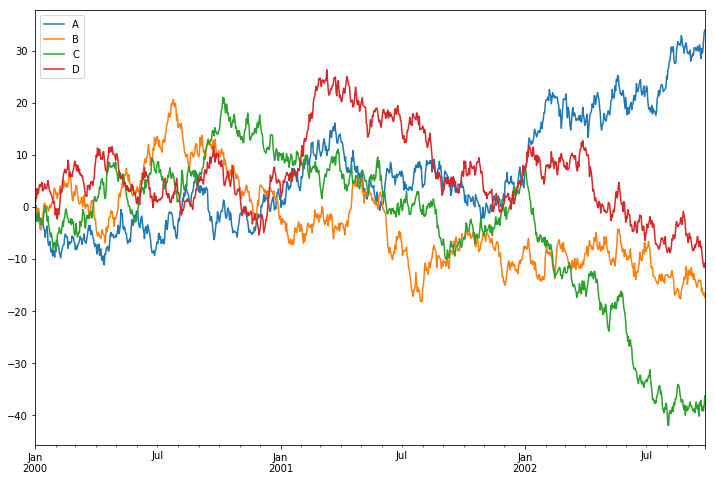

In [151]:
df = df.cumsum()

import matplotlib.pyplot as plt
df.plot(figsize=(12,8))

In [92]:
df.loc['2001-01-01':'2001-02-28']

,A,B,C,D
2001-01-01,1.232321,-13.423307,-21.778390,46.684481
2001-01-02,1.849563,-11.808915,-22.550667,46.226472
2001-01-03,4.436074,-10.592315,-24.306460,46.349046
2001-01-04,4.412062,-12.072442,-25.132061,47.009524
2001-01-05,4.518192,-10.399318,-23.918528,47.633270
2001-01-06,4.365317,-9.650021,-22.497572,48.551639
2001-01-07,5.453933,-10.001155,-23.010966,47.258382
2001-01-08,6.468970,-9.687045,-22.910533,47.008833
2001-01-09,8.777101,-7.692332,-23.687951,49.063148
2001-01-10,10.004385,-9.667708,-24.189283,48.002756


In [176]:
df = pd.DataFrame()
df['date'] = pd.date_range('1/1/2001', periods=100000, freq='min')
df['Aleatório'] = np.random.randn(100000,1)
df

,date,Aleatório
0,2001-01-01 00:00:00,-1.241186
1,2001-01-01 00:01:00,0.678111
2,2001-01-01 00:02:00,0.020426
3,2001-01-01 00:03:00,0.486330
4,2001-01-01 00:04:00,-1.583477
5,2001-01-01 00:05:00,0.096571
6,2001-01-01 00:06:00,0.050591
7,2001-01-01 00:07:00,-0.160569
8,2001-01-01 00:08:00,0.105188
9,2001-01-01 00:09:00,0.252942


In [177]:
df = df.set_index('date')
df.head()

,Aleatório
date,
2001-01-01 00:00:00,-1.241186
2001-01-01 00:01:00,0.678111
2001-01-01 00:02:00,0.020426
2001-01-01 00:03:00,0.486330
2001-01-01 00:04:00,-1.583477


In [184]:
'''
Alias   Description
B       business day frequency
D       calendar day frequency
W       weekly frequency
M       month end frequency
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T, min  minutely frequency
S       secondly frequency
L, ms   milliseonds
U, us   microseconds
N       nanoseconds
''';

In [178]:
df.loc['2001-1-1 01:00:00':'2001-1-1 01:30:00']

,Aleatório
date,
2001-01-01 01:00:00,0.684293
2001-01-01 01:01:00,-0.729047
2001-01-01 01:02:00,1.232122
2001-01-01 01:03:00,-1.148550
2001-01-01 01:04:00,-0.333139
2001-01-01 01:05:00,1.328955
2001-01-01 01:06:00,-0.848548
2001-01-01 01:07:00,-0.926880
2001-01-01 01:08:00,-0.689958


In [179]:
df['dayofweek'] = df.index.dayofweek
#(Monday =0, Tuesday=1, Wednesday=2,Thursday =3,  Friday=4 ,  Saturday =5, Sunday =6)
df['hour'] = df.index.hour
df['minute'] =df.index.minute
df.head()

,Aleatório,dayofweek,hour,minute
date,,,,
2001-01-01 00:00:00,-1.241186,0,0,0
2001-01-01 00:01:00,0.678111,0,0,1
2001-01-01 00:02:00,0.020426,0,0,2
2001-01-01 00:03:00,0.486330,0,0,3
2001-01-01 00:04:00,-1.583477,0,0,4


In [185]:
df['dayofweek_name'] = df.index.weekday_name
df.head()

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

,Aleatório,dayofweek,hour,minute,dayofweek_name
date,,,,,
2001-01-01 00:00:00,-1.241186,0,0,0,Monday
2001-01-01 00:01:00,0.678111,0,0,1,Monday
2001-01-01 00:02:00,0.020426,0,0,2,Monday
2001-01-01 00:03:00,0.486330,0,0,3,Monday
2001-01-01 00:04:00,-1.583477,0,0,4,Monday


In [181]:
df.between_time('12:30', '17:18')

,Aleatório,dayofweek,hour,minute,dayofweek_name
date,,,,,
2001-01-01 12:30:00,2.397602,0,12,30,Monday
2001-01-01 12:31:00,0.309113,0,12,31,Monday
2001-01-01 12:32:00,0.822928,0,12,32,Monday
2001-01-01 12:33:00,-0.205543,0,12,33,Monday
2001-01-01 12:34:00,1.320962,0,12,34,Monday
2001-01-01 12:35:00,-0.324194,0,12,35,Monday
2001-01-01 12:36:00,1.741009,0,12,36,Monday
2001-01-01 12:37:00,0.101698,0,12,37,Monday
2001-01-01 12:38:00,0.925455,0,12,38,Monday


In [152]:
df = pd.DataFrame()
df['date'] = pd.date_range('1/1/2001', periods=10000000, freq='min')
df['Aleatório'] = np.random.randn(10000000,1)
df = df.set_index('date')

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000000 entries, 2001-01-01 00:00:00 to 2020-01-06 10:39:00
Data columns (total 1 columns):
Aleatório    float64
dtypes: float64(1)
memory usage: 152.6 MB


In [143]:
df = df.resample('10Min').mean()
df.head()

,Aleatório
date,
2001-01-01 00:00:00,0.660204
2001-01-01 00:10:00,-0.393279
2001-01-01 00:20:00,-0.024977
2001-01-01 00:30:00,0.295468
2001-01-01 00:40:00,0.063346


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2001-01-01 00:00:00 to 2020-01-06 10:30:00
Freq: 10T
Data columns (total 1 columns):
Aleatório    1000000 non-null float64
dtypes: float64(1)
memory usage: 15.3 MB


In [153]:
df = df.resample('D').mean()
df.head()

,Aleatório
date,
2001-01-01,-0.033274
2001-01-02,0.000045
2001-01-03,-0.013096
2001-01-04,-0.017250
2001-01-05,-0.002860


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6945 entries, 2001-01-01 to 2020-01-06
Freq: D
Data columns (total 1 columns):
Aleatório    6945 non-null float64
dtypes: float64(1)
memory usage: 108.5 KB


In [155]:
df['média móvel'] = df['Aleatório'].rolling(12).mean()
df

,Aleatório,média móvel
date,,
2001-01-01,-0.033274,NaN
2001-01-02,0.000045,NaN
2001-01-03,-0.013096,NaN
2001-01-04,-0.017250,NaN
2001-01-05,-0.002860,NaN
2001-01-06,0.023867,NaN
2001-01-07,-0.014176,NaN
2001-01-08,0.053041,NaN
2001-01-09,-0.008656,NaN


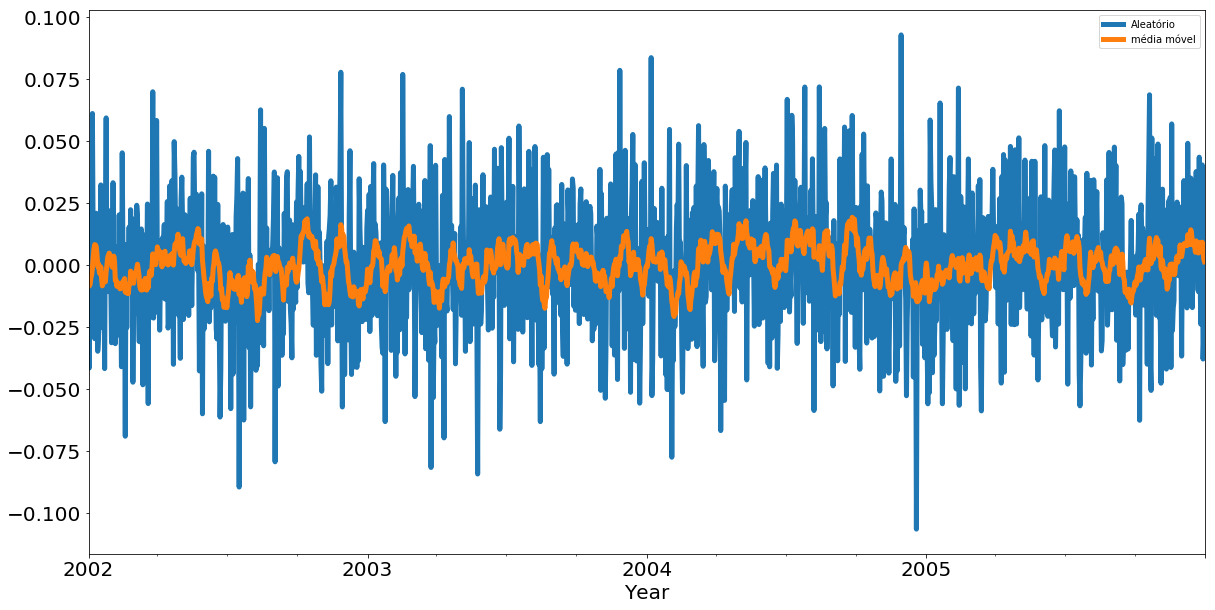

In [164]:
df['2002':'2005'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

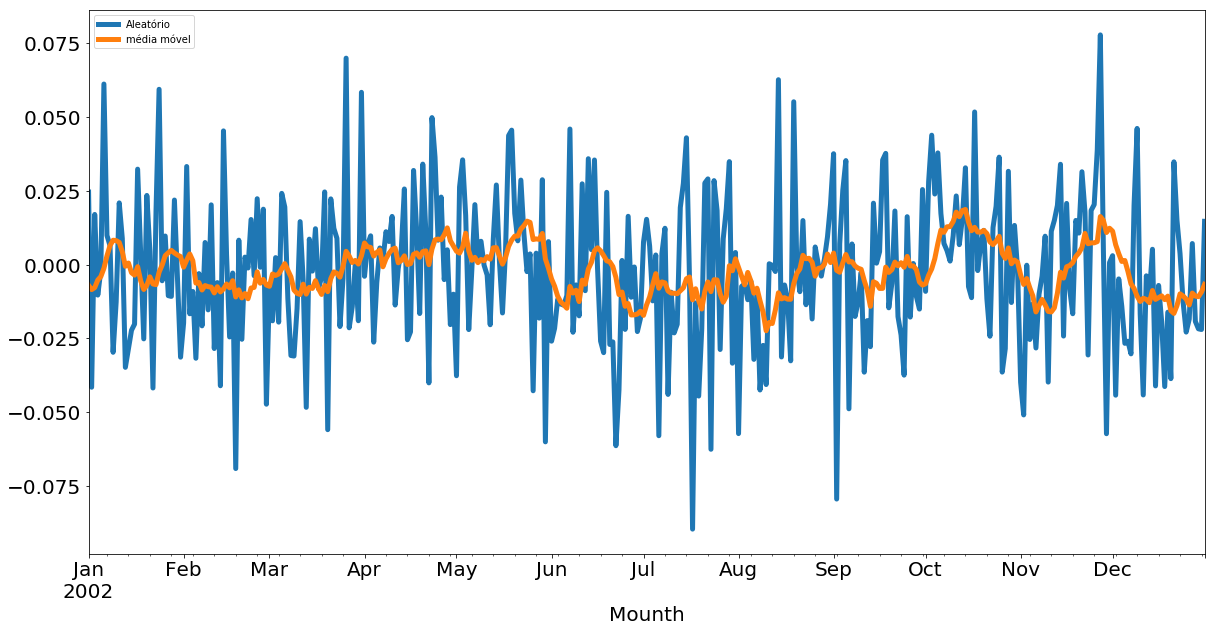

In [167]:
df['2002':'2002'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Mounth', fontsize=20);

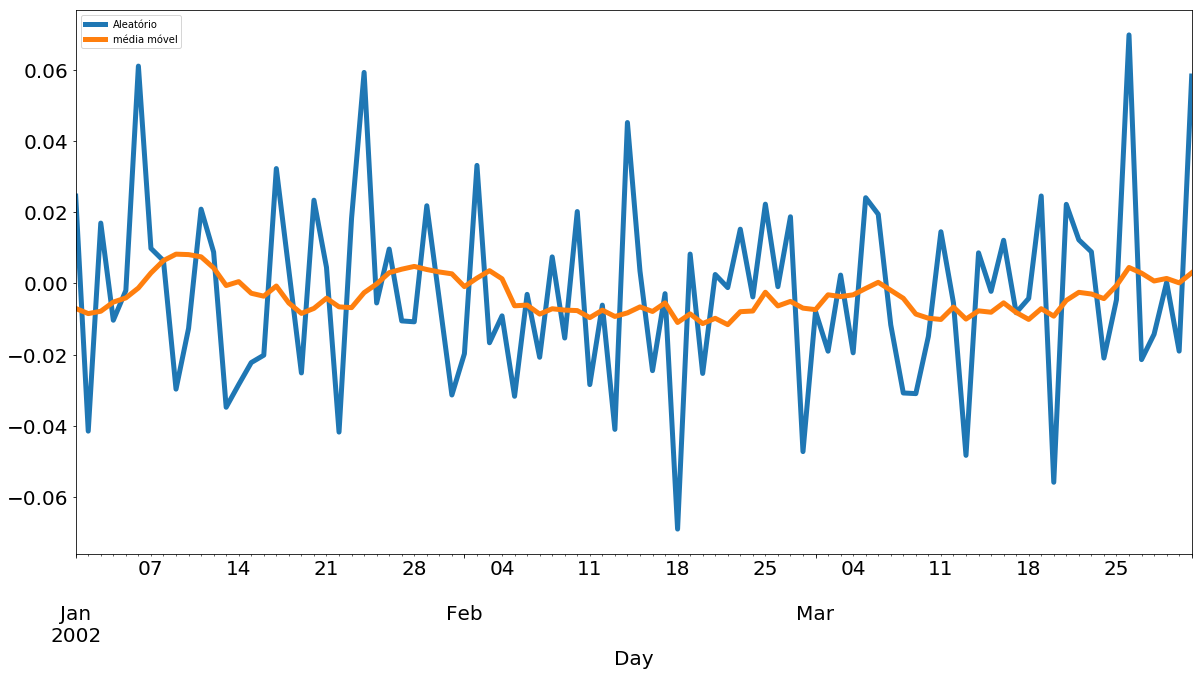

In [168]:
df['01-2002':'03-2002'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Day', fontsize=20);